## **Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import matplotlib.image as mpimg
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import DirectoryIterator
import glob
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
base_path  = r'/content/drive/MyDrive/Awareness of Waste Recycling'

classes = os.listdir(base_path)
print(classes)

img_list = glob.glob(os.path.join(base_path, '*/*.png'))

print("Total Waste Images: ",len(img_list))

['metal', 'e-waste', 'glass', 'plastic', 'light blubs', 'batteries', 'organic', 'clothes', 'paper']
Total Waste Images:  7605


## **Some Visualizations**

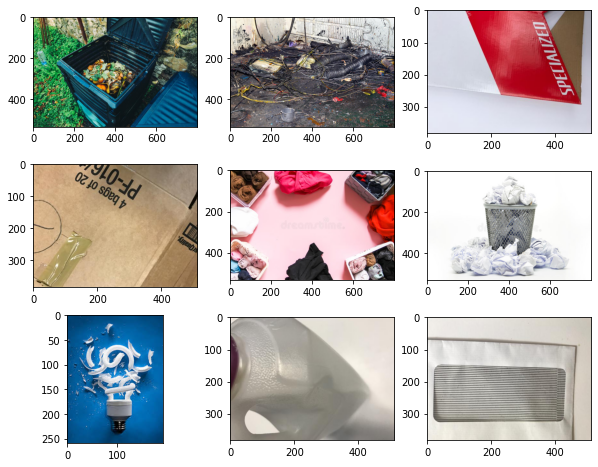

In [4]:
from PIL import Image
plt.figure(figsize=(10,8))
for i, img_path in enumerate(random.sample(img_list, 9)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(3, 3, i+1)
    plt.imshow(img.squeeze())

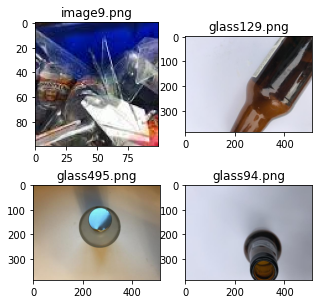

In [5]:
random.seed(10)
plt.figure(figsize=(5,5))

glass_folder = "/content/drive/MyDrive/Awareness of Waste Recycling/glass"
for i in range(4):
    file = random.choice(os.listdir(glass_folder))
    image_path= os.path.join(glass_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(2,2,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [6]:
from gc import garbage
path = r"/content/drive/MyDrive/Awareness of Waste Recycling/"
garbage = []
garbage_images = []
for i in os.listdir(path):
    for image_filename in os.listdir(path + i):
        garbage.append(i) # name of the fruit 
        garbage_images.append(i + '/' + image_filename) # image of the fruit

In [7]:
train_garbage_images = pd.DataFrame(garbage, columns=["Garbage"])
train_garbage_images["Garbage Images"] = garbage_images

In [8]:
train_garbage_images

,Garbage,Garbage Images
0,metal,metal/metal181.png
1,metal,metal/metal184.png
2,metal,metal/metal183.png
3,metal,metal/metal186.png
4,metal,metal/metal185.png
...,...,...
7600,paper,paper/paper515.png
7601,paper,paper/paper516.png
7602,paper,paper/paper517.png
7603,paper,paper/paper518.png


In [9]:
from collections import Counter
newData = Counter(train_garbage_images["Garbage"])
most_garbage = newData.most_common(9)

print("The most frequently found garbage in the data set and their number")
most_garbage

The most frequently found garbage in the data set and their number


[('paper', 1467),
 ('plastic', 1244),
 ('metal', 1092),
 ('glass', 773),
 ('clothes', 729),
 ('organic', 671),
 ('light blubs', 650),
 ('e-waste', 624),
 ('batteries', 355)]

In [10]:
x,y = zip(*most_garbage)
x,y = list(x),list(y)

In [11]:
print("The most frequently found garbage in the dataset -- > \n ", x)

The most frequently found garbage in the dataset -- > 
  ['paper', 'plastic', 'metal', 'glass', 'clothes', 'organic', 'light blubs', 'e-waste', 'batteries']


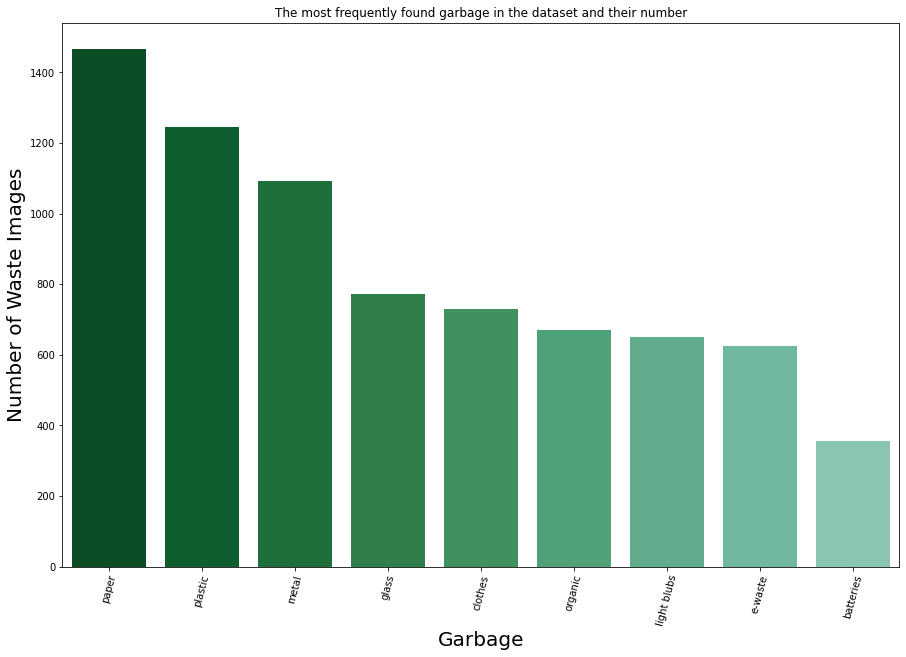

In [12]:
import seaborn as sns
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y, palette=sns.color_palette("BuGn_r", 15)) 
plt.xlabel('Garbage', size = 20) 
plt.ylabel('Number of Waste Images', size = 20 )
plt.xticks(rotation = 75)
plt.title('The most frequently found garbage in the dataset and their number') 
plt.show()

In [13]:
# let's prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True,validation_split=0.2)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/Awareness of Waste Recycling",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical",subset='training')

Found 6088 images belonging to 9 classes.


In [14]:
# let's prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_val = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True,validation_split=0.2)

val_ds = gen_val.flow_from_directory("/content/drive/MyDrive/Awareness of Waste Recycling",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical",subset='validation')

Found 1517 images belonging to 9 classes.


In [15]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

58900480/58889256 [==============================] - 1s 0us/step


In [16]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [17]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [18]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 9, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 30, steps_per_epoch=len(train_data), validation_data=val_ds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/30
191/191 [==============================] - 1927s 10s/step - loss: 1.9419 - accuracy: 0.3300 - val_loss: 1.8618 - val_accuracy: 0.4061
Epoch 2/30
191/191 [==============================] - 217s 1s/step - loss: 1.5958 - accuracy: 0.4461 - val_loss: 2.0222 - val_accuracy: 0.3125
Epoch 3/30
191/191 [==============================] - 198s 1s/step - loss: 1.4846 - accuracy: 0.4778 - val_loss: 1.9509 - val_accuracy: 0.3949
Epoch 4/30
191/191 [==============================] - 196s 1s/step - loss: 1.3508 - accuracy: 0.5264 - val_loss: 1.8812 - val_accuracy: 0.4008
Epoch 5/30
191/191 [==============================] - 191s 1s/step - loss: 1.3197 - accuracy: 0.5458 - val_loss: 1.9615 - val_accuracy: 0.4140
Epoch 6/30
191/191 [==============================] - 190s 994ms/step - loss: 1.2902 - accuracy: 0.5535 - val_loss: 2.1636 - val_accuracy: 0.3698
Epoch 7/30
191/191 [==============================] - 188s 984ms/step - loss: 1.2008 - accuracy: 0.5848 - val_loss: 1.7826 - val_accuracy

In [20]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

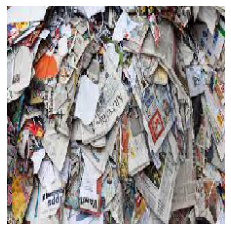

Your waste material is  paper  with  99.97  % accuracy


In [21]:
waste_prediction("/content/drive/MyDrive/paper.jfif")

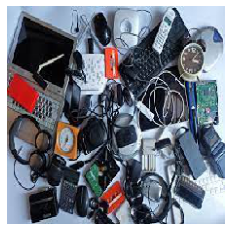

Your waste material is  e-waste  with  100.0  % accuracy


In [22]:
waste_prediction("/content/drive/MyDrive/e-waste.jpg")

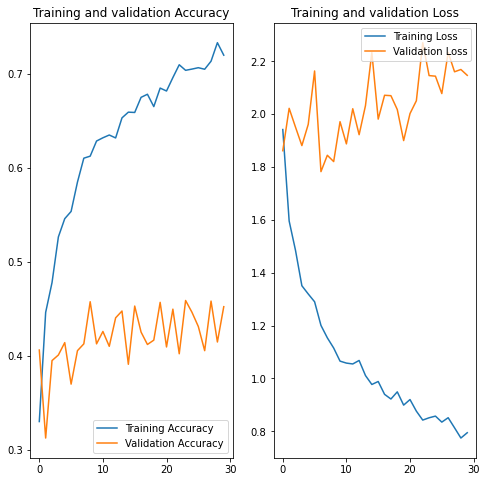

In [23]:
epochs =30
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation Loss')
plt.show()

In [ ]:
model.save("classifyWaste.h5")